# Python Machine Learning学习笔记

## 1.1 机器学习总揽
监督学习：预测数据  
* 分类：预测已有类型  
* * 回归：预测走势  
* 强化学习：解决交互问题  
* 非监督学习：发现隐藏结构  
* * 聚类：寻找子集  
* * 降维：数据压缩  

### sklearn总结的机器学习算法选择:  
![](https://raw.githubusercontent.com/lichao890427/lichao890427.github.io/master/_res/ml_map.png)

### 常用数据集
* 鸢尾花类型数据集 https://archive.ics.uci.edu/ml/datasets/Iris
* 工资普查数据集 https://archive.ics.uci.edu/ml/datasets/Adult
* 酒品种数据集 https://archive.ics.uci.edu/ml/datasets/Wine
* 车型满意度数据集 https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
* 森林火灾面积数据集 https://archive.ics.uci.edu/ml/datasets/Forest+Fires


## 1.2 使用sklearn感知器实现分类器

In [2]:
# coding: utf-8
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
iris = datasets.load_iris() # 加载鸢尾花数据库
X = iris.data[:, [2, 3]] # 选择花萼长度、花萼宽度、花瓣长度、花瓣宽度4个属性中的后2个
y = iris.target
# 将数据集的30%置为测试集，70%置为训练集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler() # 标准化数据，大幅度提高准确性
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

ppn = Perceptron(tol=40, eta0=0.1, random_state=0) # 使用sklearn感知器训练数据
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) # 输出误判数
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred)) # 输出准确率

Misclassified samples: 1
Accuracy: 0.98


机器学习模型的学习效果评价基于测试集，而不依赖于训练集；过拟合的含义是模型可以很好的匹配训练集，但是对于未知的训练集数据效果不佳；下面的代码是之前的分类器模型可视化：

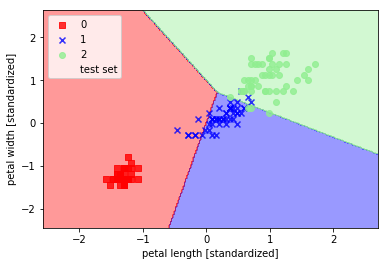

In [4]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot all samples
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o', s=55, label='test set')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()


感知器算法对于无法线性分割的数据集，是不收敛的，因此实际中很少只用感知器算法。后面将会介绍更强大的线性分类器，对无法线性分割的数据集可以收敛到最佳程度

## 1.3 使用sklearn逻辑回归实现分类器
&emsp;&emsp;前面使用最简单的感知器实现了分类，存在的一个巨大缺陷是分类器对于无法线性分割的数据无法收敛。逻辑回归是另一种用于解决线性/二进制分类问题的算法，虽然名为逻辑回归，却是分类器模型，而非回归模型。逻辑回归在工业中使用很广泛

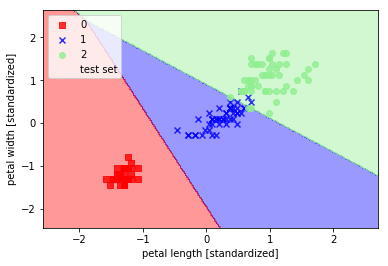

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### 使用正规化解决过拟合
&emsp;&emsp;过拟合是机器学习很常见的问题，在过拟合时，模型对训练数据集表现良好而对测试数据集表现欠佳。可能的原因是包含太多参数导致模型过于复杂；同样的欠拟合是模型过于简单，对训练数据集和测试数据集表现都不理想;使用正规化可以从数据中去除噪声从而防止过拟合

## 1.4 使用sklearn SVM实现分类器
&emsp;&emsp;另一个有效且广泛实用的学习算法是SVM（支持向量机），可以认为是感知器的扩展。使用感知器算法可以最小化误分类，而使用SVM可以最小化类间距（松弛变量），并解决非线性分割问题。

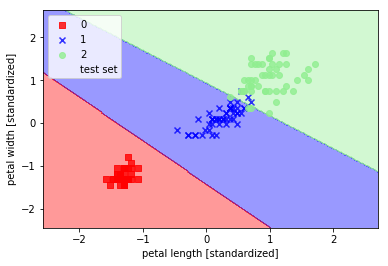

In [7]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### 核函数SVM解决非线性分类问题
&emsp;&emsp;SVM算法另一个吸引人的地方是可以使用核函数解决非线性分类问题。典型的非线性问题例子如下图。

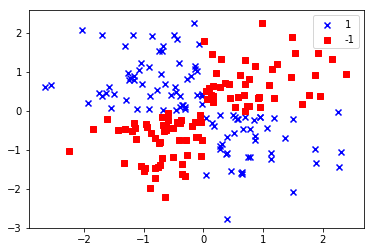

In [8]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

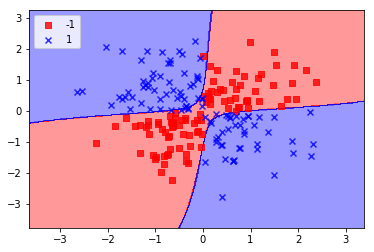

In [9]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

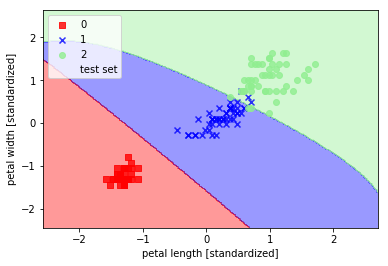

In [10]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

调整gamma参数

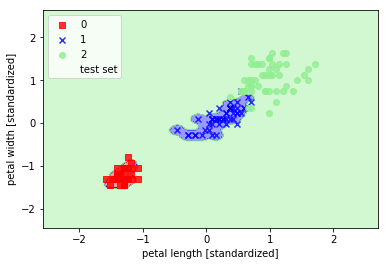

In [11]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 1.5 使用sklearn决策树实现分类器
&emsp;&emsp;如果我们关心的是模型的可解释性，决策树是有用的模型，通过不断问问题走向不同的分支，最终得到类型

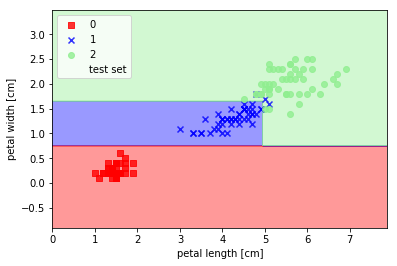

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

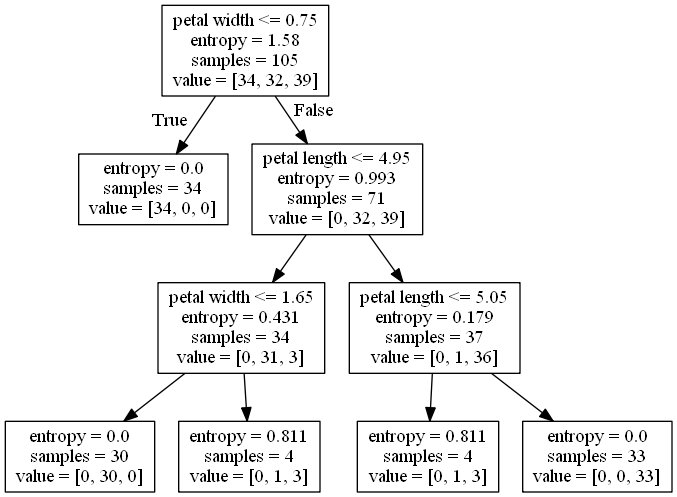

In [19]:
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=['petal length', 'petal width'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## 1.6 使用随机森林实现分类器
&emsp;&emsp;随机森林由于在实现分类时效果良好，可伸缩，易用的特性比较受欢迎。随机森林可以看作决策树的组合，弱弱联合组成更健壮的模型，降低决策树的过拟合。随机森林算法可以总结为4步：
* 从样本集中通过重采样的方式产生n个样本
* 假设样本特征数目为a，对n个样本选择a中的k个特征，用建立决策树的方式获得最佳分割点
* 重复m次，产生m棵决策树
* 多数投票机制来进行预测
&emsp;&emsp;随机森林的优势在于无需考虑如何选择超参数，模型足够健壮无需剪枝，只需要考虑决策树的个数k，k越大表现越良好但是计算成本就越大。

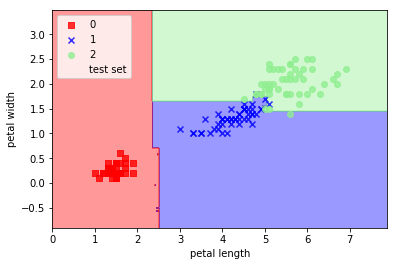

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## 1.7 K近邻算法实现分类器
&emsp;&emsp;这是一个监督机器学习算法(KNN)，KNN是典型的懒惰学习算法，他会记忆训练数据集而不是从数据集得到判断函数
### 参数模型和非参数模型
&emsp;&emsp;机器学习算法可分为参数模型和非参数模型。参数模型用于从训练集估计参数，产生的函数无需用到以前的数据就可以为新数据分类，典型的例子是感知器、逻辑回归、线性SVM；非参数模型无法从固定参数集合获取特征，且参数数量随着训练集增加而增加，典型的例子是决策树、随机森林和核函数SVM、K近邻

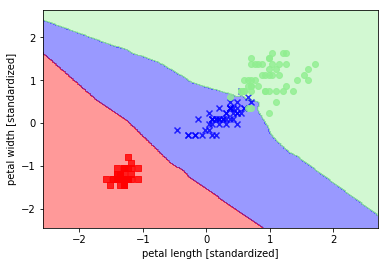

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

## 减小过拟合
* 收集更多数据
* 通过正规化引入复杂度惩罚(L1正规化)
* 使用更少参数构建简单一些的模型
* 降维(序列化特征选择)

### 使用L1正规化

In [46]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
    'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
    'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
lr1 = LogisticRegression(penalty='l1',C=5)
lr1.fit(X_train_std, y_train)
print('Training accuracy(With L1 regularzition):', lr1.score(X_train_std, y_train))
print('Test accuracy(With L1 regularzition):', lr1.score(X_test_std, y_test))

('Class labels', array([1, 2, 3], dtype=int64))
('Training accuracy:', 0.99193548387096775)
('Test accuracy:', 1.0)
('Training accuracy(With L1 regularzition):', 1.0)
('Test accuracy(With L1 regularzition):', 1.0)


### 使用SBS序列化特征选择

In [47]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

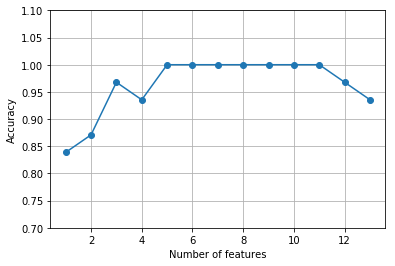

In [48]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

我们挑选5个特征检查是否带来改善,从结果可以看出，使用更少的属性，测试集的准确率提高了2%

In [50]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy(select 5):', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy(select 5):', knn.score(X_test_std[:, k5], y_test))



Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')
('Training accuracy:', 0.9838709677419355)
('Test accuracy:', 0.94444444444444442)
('Training accuracy(select 5):', 0.95967741935483875)
('Test accuracy(select 5):', 0.96296296296296291)


### 使用随机森林评估特征重要程度
&emsp;&emsp;前面我们用L1标准化去除不相关特征，用SBS算法选择特征。另一种选择相关特性的方式是随机森林。

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Proanthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) Proline                        0.013916


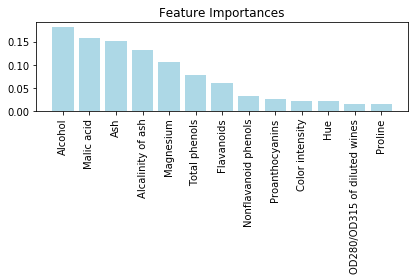

In [52]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

## 2.1 通过降维压缩数据
* 主特征分析(PCA)，压缩非监督学习数据
* 线性判别分析(PDA)，降维监督学习数据
* 核心主特征分析(KPCA)，降维非线性数据
### Sklearn PCA

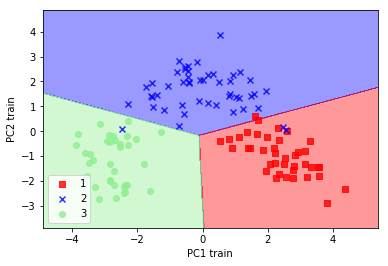

In [10]:
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)        
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1 train')
plt.ylabel('PC2 train')
plt.legend(loc='lower left')
plt.show()

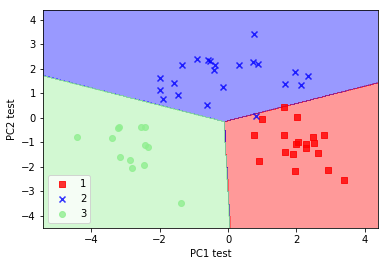

In [11]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1 test')
plt.ylabel('PC2 test')
plt.legend(loc='lower left')
plt.show()